In [1]:
#1. Load the dataset and explore the variables.

#2. We will try to predict variable Churn using a logistic regression on variables 'tenure', 'SeniorCitizen', 'MonthlyCharges'.

#3. Extract the target variable.

#4. Extract the independent variables and scale them.

#5. Build the logistic regression model.

#6. Evaluate the model.

#7. Even a simple model will give us more than 70% accuracy. Why?

#8.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [2]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers=pd.read_csv('customer_churn.csv')
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customers2 = customers[['SeniorCitizen','tenure','MonthlyCharges','Churn']]
customers2

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [6]:
customers2.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [11]:
def transform_churn(x):
    if x == 'Yes':
        return 1
    else:
        return 0

customers2['Churn'] = list(map(transform_churn,customers2['Churn']))
customers2.head()

C:\Users\13306\AppData\Local\Temp\ipykernel_16828\2187242887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers2['Churn'] = list(map(transform_churn,customers2['Churn']))


,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [12]:
X = customers2.drop(['Churn'], axis=1)
y = customers2['Churn']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train)
X_std_train = transformer.transform(X_train)
X_std_train = pd.DataFrame(X_std_train,columns=X.columns)

X_std_test = transformer.transform(X_test)
X_std_test = pd.DataFrame(X_std_test,columns=X.columns)

In [15]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state =0, solver='lbfgs').fit(X_std_train,y_train)
classification.score(X_std_test, y_test)

0.7936583057264552

<AxesSubplot:>

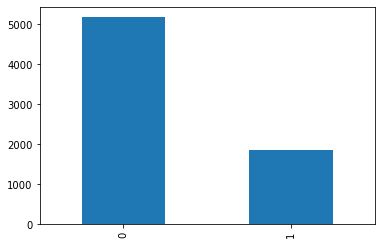

In [17]:
balance_target = pd.value_counts(customers2['Churn'])
balance_target.plot(kind = 'bar')

In [ ]:
# It's due to the imbalance between the Yes & No in Churn (this is the only thing I understand)

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_std_train,y_train)

In [23]:
class_smote = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train_SMOTE,y_train_SMOTE)
class_smote.score(X_std_test, y_test)

0.7411263606247042

In [27]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)


pred = LR.predict(X_std_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5161676646706587
recall:  0.7508710801393729
f1:  0.6117814052519518
